<a href="https://colab.research.google.com/github/AdilBasha9396/CKD-Predection-using-machine-learning/blob/main/CKD_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kidney_disease.csv")

In [ ]:
  df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-8-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-8-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-8-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [ ]:
#Split the data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [ ]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [ ]:
#Build The model

model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0])

In [ ]:
#Save the model
model.save("ckd.model")

Text(0.5, 0, 'epoch')

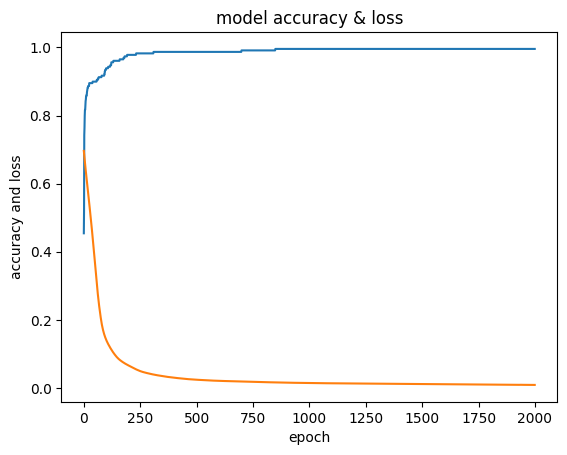

In [ ]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
#plt.legend(['acc', 'loss'], loc='lower right')
#plt.show()

In [ ]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
---------------------------------------------------------


In [ ]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()


Model file:  ckd.model
2/2 [==============================] - 0s 10ms/step - loss: 2.5820e-04 - accuracy: 1.0000

Original  : 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1

Predicted : 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1

Scores    : loss =  0.0002582032175268978  acc =  1.0
---------------------------------------------------------



In [ ]:
pred=model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
print(y_test)
print(pred)
# 0 indicate normal
# 1 indicate abnormal

239    0
91     0
311    1
169    0
157    0
227    0
347    1
107    0
308    1
249    0
123    0
359    1
71     0
1      0
43     0
321    1
372    1
251    1
5      0
380    1
200    0
333    1
303    1
357    1
272    1
370    1
278    1
147    0
317    1
26     0
369    1
325    1
213    0
298    1
331    1
335    1
187    0
8      0
152    0
117    0
242    0
252    1
257    1
329    1
31     0
111    0
320    1
235    0
374    1
381    1
337    1
267    1
171    0
46     0
150    0
155    0
139    0
103    0
Name: classification, dtype: int64
[[0.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [0.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 [0.000000e

In [ ]:
print('Original {0}:'.format(", ".join(str(x) for x in y_test)))
print('Predict  {0}:'.format(", ".join(str(x) for x in pred)))

Original 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0:
Predict  [0.], [0.], [1.], [0.], [0.], [0.], [1.], [0.], [1.], [0.], [0.], [1.], [0.], [0.], [0.], [1.], [1.], [1.], [0.], [1.], [0.], [1.], [1.], [1.], [1.], [1.], [1.], [0.], [1.], [0.], [1.], [1.], [0.], [0.9615525], [1.], [1.], [0.], [0.], [0.], [0.4140452], [0.], [1.], [1.], [1.], [0.], [0.], [1.], [0.], [1.], [1.], [1.], [1.], [0.], [0.], [7.072091e-05], [0.], [0.], [0.]:


In [ ]:
print("https://www.kidney.org/phi/form?version=health")

https://www.kidney.org/phi/form?version=health
